#**Credit Loan Prediction**

#Business Problem

## Problem Statement

Risiko kredit adalah kerugian yang berhubungan dengan potensi kegagalan dalam memenuhi kewajiban membayar kredit ketika waktu jatuh tempo. Dengan kata lain, risiko kredit adalah kemungkinan debitur tidak mampu atau tidak ingin membayar pinjamannya pada saat jatuh tempo atau sesudahnya.

Salah satu faktor penyebab terjadinya risiko kredit adalah kesalahan penilaian dalam keputusan pemberian pinjaman oleh perusahaan kredit atau lembaga keuangan seperti bank. Jika perusahaan dapat menerapkan kebijakan pemberian kredit yang sehat, kemungkinan risiko masalah akan kecil.

## Analytic Approach

Membangun sebuah predictive model menggunakan algoritma machine learning yang akan dibuat berdasarkan loan dataset berisi transaksi yang pernah dilakukan oleh peminjam.

Model ini bertujuan untuk:
- mengoptimalkan akurasi prediksi risiko kredit untuk memperbaiki keputusan pemberian pinjaman kepada klien.
- mengurangi risiko kerugian tanpa adanya pembuatan keputusan transaksi peminjaman secara manual yang dapat menimbulkan human error.
- menciptakan dampak positif untuk perusahaan dengan pencegahan financial loss, serta memberi efisiensi dalam operasional perusahaan.

# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Data Understanding


In [2]:
#load data
df = pd.read_csv("loan_data_2007_2014.csv")

In [3]:
#value of (x, y) -> (rows, columns)
df.shape

(466285, 75)

In [4]:
#to view the first 5 rows
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#retrieve data column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# Data Cleansing


In [6]:
#duplicated values
df.duplicated().sum()

0

In [7]:
#total missing values per column

dtypes = [df[col].dtype for col in df.columns]
items_count = len(df)
unique = (df[col].unique() for col in df.columns)
total_null = df.isnull().sum()
percentage_missing = round(df.isnull().sum() * 100 / df.shape[0])

df_missing = pd.DataFrame({'data_type': dtypes,
                                'count': items_count,
                                'unique': unique,
                                'total_missing': total_null,
                                'percent_missing': percentage_missing})
df_missing.sort_values('percent_missing', ascending = False,inplace = True)

df_missing

,data_type,count,unique,total_missing,percent_missing
inq_last_12m,float64,466285,[nan],466285,100.0
verification_status_joint,float64,466285,[nan],466285,100.0
open_acc_6m,float64,466285,[nan],466285,100.0
open_il_6m,float64,466285,[nan],466285,100.0
open_il_12m,float64,466285,[nan],466285,100.0
open_il_24m,float64,466285,[nan],466285,100.0
mths_since_rcnt_il,float64,466285,[nan],466285,100.0
annual_inc_joint,float64,466285,[nan],466285,100.0
total_bal_il,float64,466285,[nan],466285,100.0
il_util,float64,466285,[nan],466285,100.0


Ada beberapa fitur yang akan di drop yang berupa:
- Feature Unnamed: 0, id, and member_id yang memiliki jumlah nilai unique 466285, yang terlalu bervariasi, sehingga tidak terlalu relevan untuk melakukan prediksi loan credit.
- Kolom dengan jumlah missing value yang tinggi (>= 25%)
- Kolom yang termasuk target leakage
- Values yang kosong/null

In [8]:
#dropping columns with a high amount of missing values
df.drop(columns=df_missing.loc[df_missing['percent_missing']> 25].index.tolist(), inplace = True)

In [9]:
#cleansing all NaN values
df = df.dropna(axis=1, how='all')

#number of columns now
df.shape[1]

53

In [10]:
#dropping irrelevant data
df.drop(columns=['id', 'member_id','url', 'title',
                 'addr_state','zip_code','policy_code',
                 'application_type','emp_title', 'sub_grade', 'Unnamed: 0',
                 'issue_d', 'earliest_cr_line', 'last_pymnt_d',
                 'last_credit_pull_d', 'pymnt_plan'], inplace = True)

In [11]:
#categorical statistic value
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.000000,63000.000000,88960.00000,7.500000e+06
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.000000,0.000000,0.00000,2.900000e+01
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.000000,0.000000,1.00000,3.300000e+01
open_acc,466256.0,11.187069,4.987526,0.00,8.000000,10.000000,14.00000,8.400000e+01


In [12]:
#categorical statistic value
df.describe(include = 'O').T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
loan_status,466285,9,Current,224226
purpose,466285,14,debt_consolidation,274195
initial_list_status,466285,2,f,303005


# Exploratory Data Analysis

###Define Target

In [13]:
#target feature: loan status
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Kita akan membagi kolom loan_status menjadi 2 klasifikasi binary, dimana:

- 1 berarti peminjam kemungkinan akan membayar hutang dengan lancar  (suitable) yang berlaku untuk kolom-kolom Current, Fully Paid, dan In Grace Period
- 0 berarti peminjam kemungkinan tidak akan membayar hutang dengan lancar (not suitable)

In [14]:
# listing values that are into suitable for loan approval list
suitable = ['Current', 'Fully Paid', 'In Grace Period']

# encoding loan_status
df['loan_status'] = np.where(df['loan_status'].isin(suitable), 1, 0)
df['loan_status'].value_counts()/len(df)*100

1    88.381784
0    11.618216
Name: loan_status, dtype: float64

### Multivariate Analysis

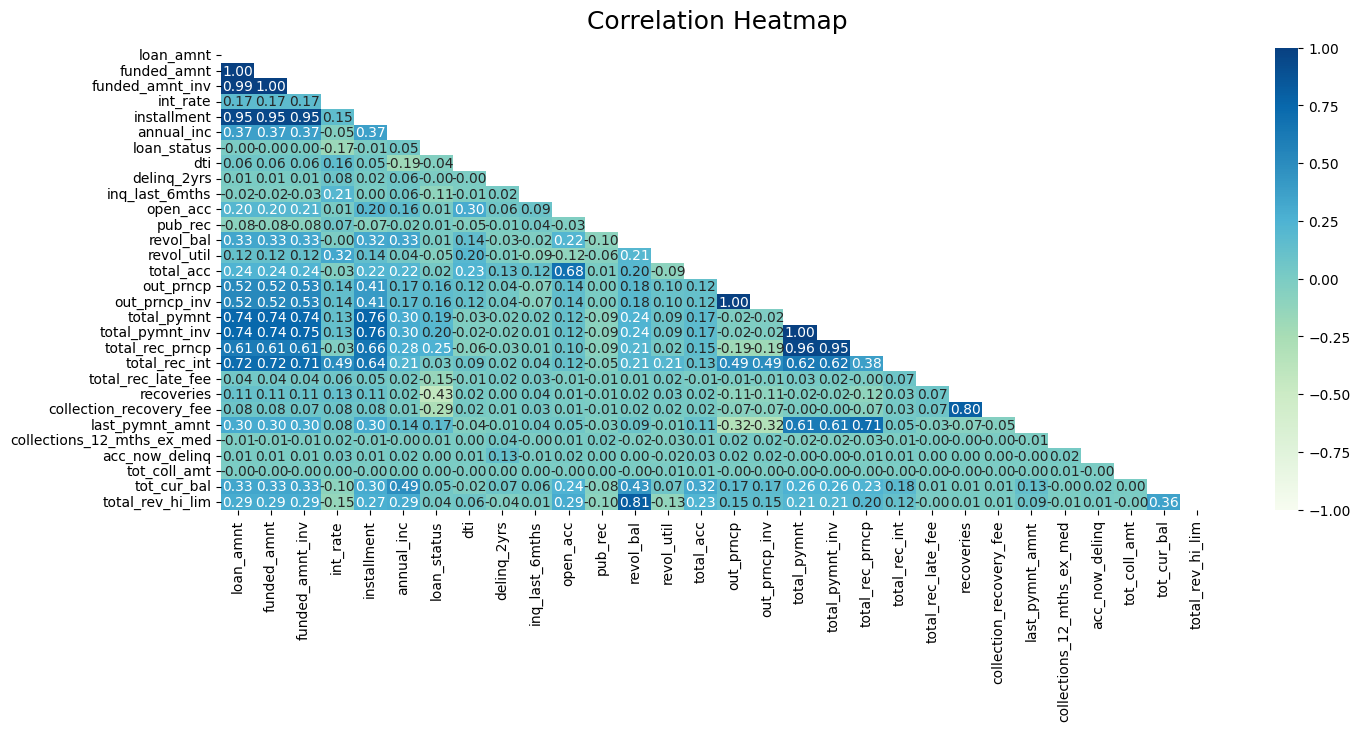

In [16]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap='GnBu',
          annot=True, fmt='.2f').set_title('Correlation Heatmap',
          fontdict={'fontsize':18}, pad=14)
plt.show()

Dari correlation heatmap diatas, kita akan drop feature dengan nilai ketergantungan lebih dari 0.7 untuk menghindari hasil-hasil yang kurang dapat diandalkan atau bersifat biased.

In [17]:
#drop highly correlated features to prevent biased results
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_correlation = [column for column in upper.columns if any(upper[column] > 0.7)]
high_correlation

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim']

In [18]:
df.drop(high_correlation, axis=1, inplace=True)

### Univariate Analysis

In [19]:
num = df.select_dtypes(include='number').columns
cat = df.select_dtypes(include='object').columns

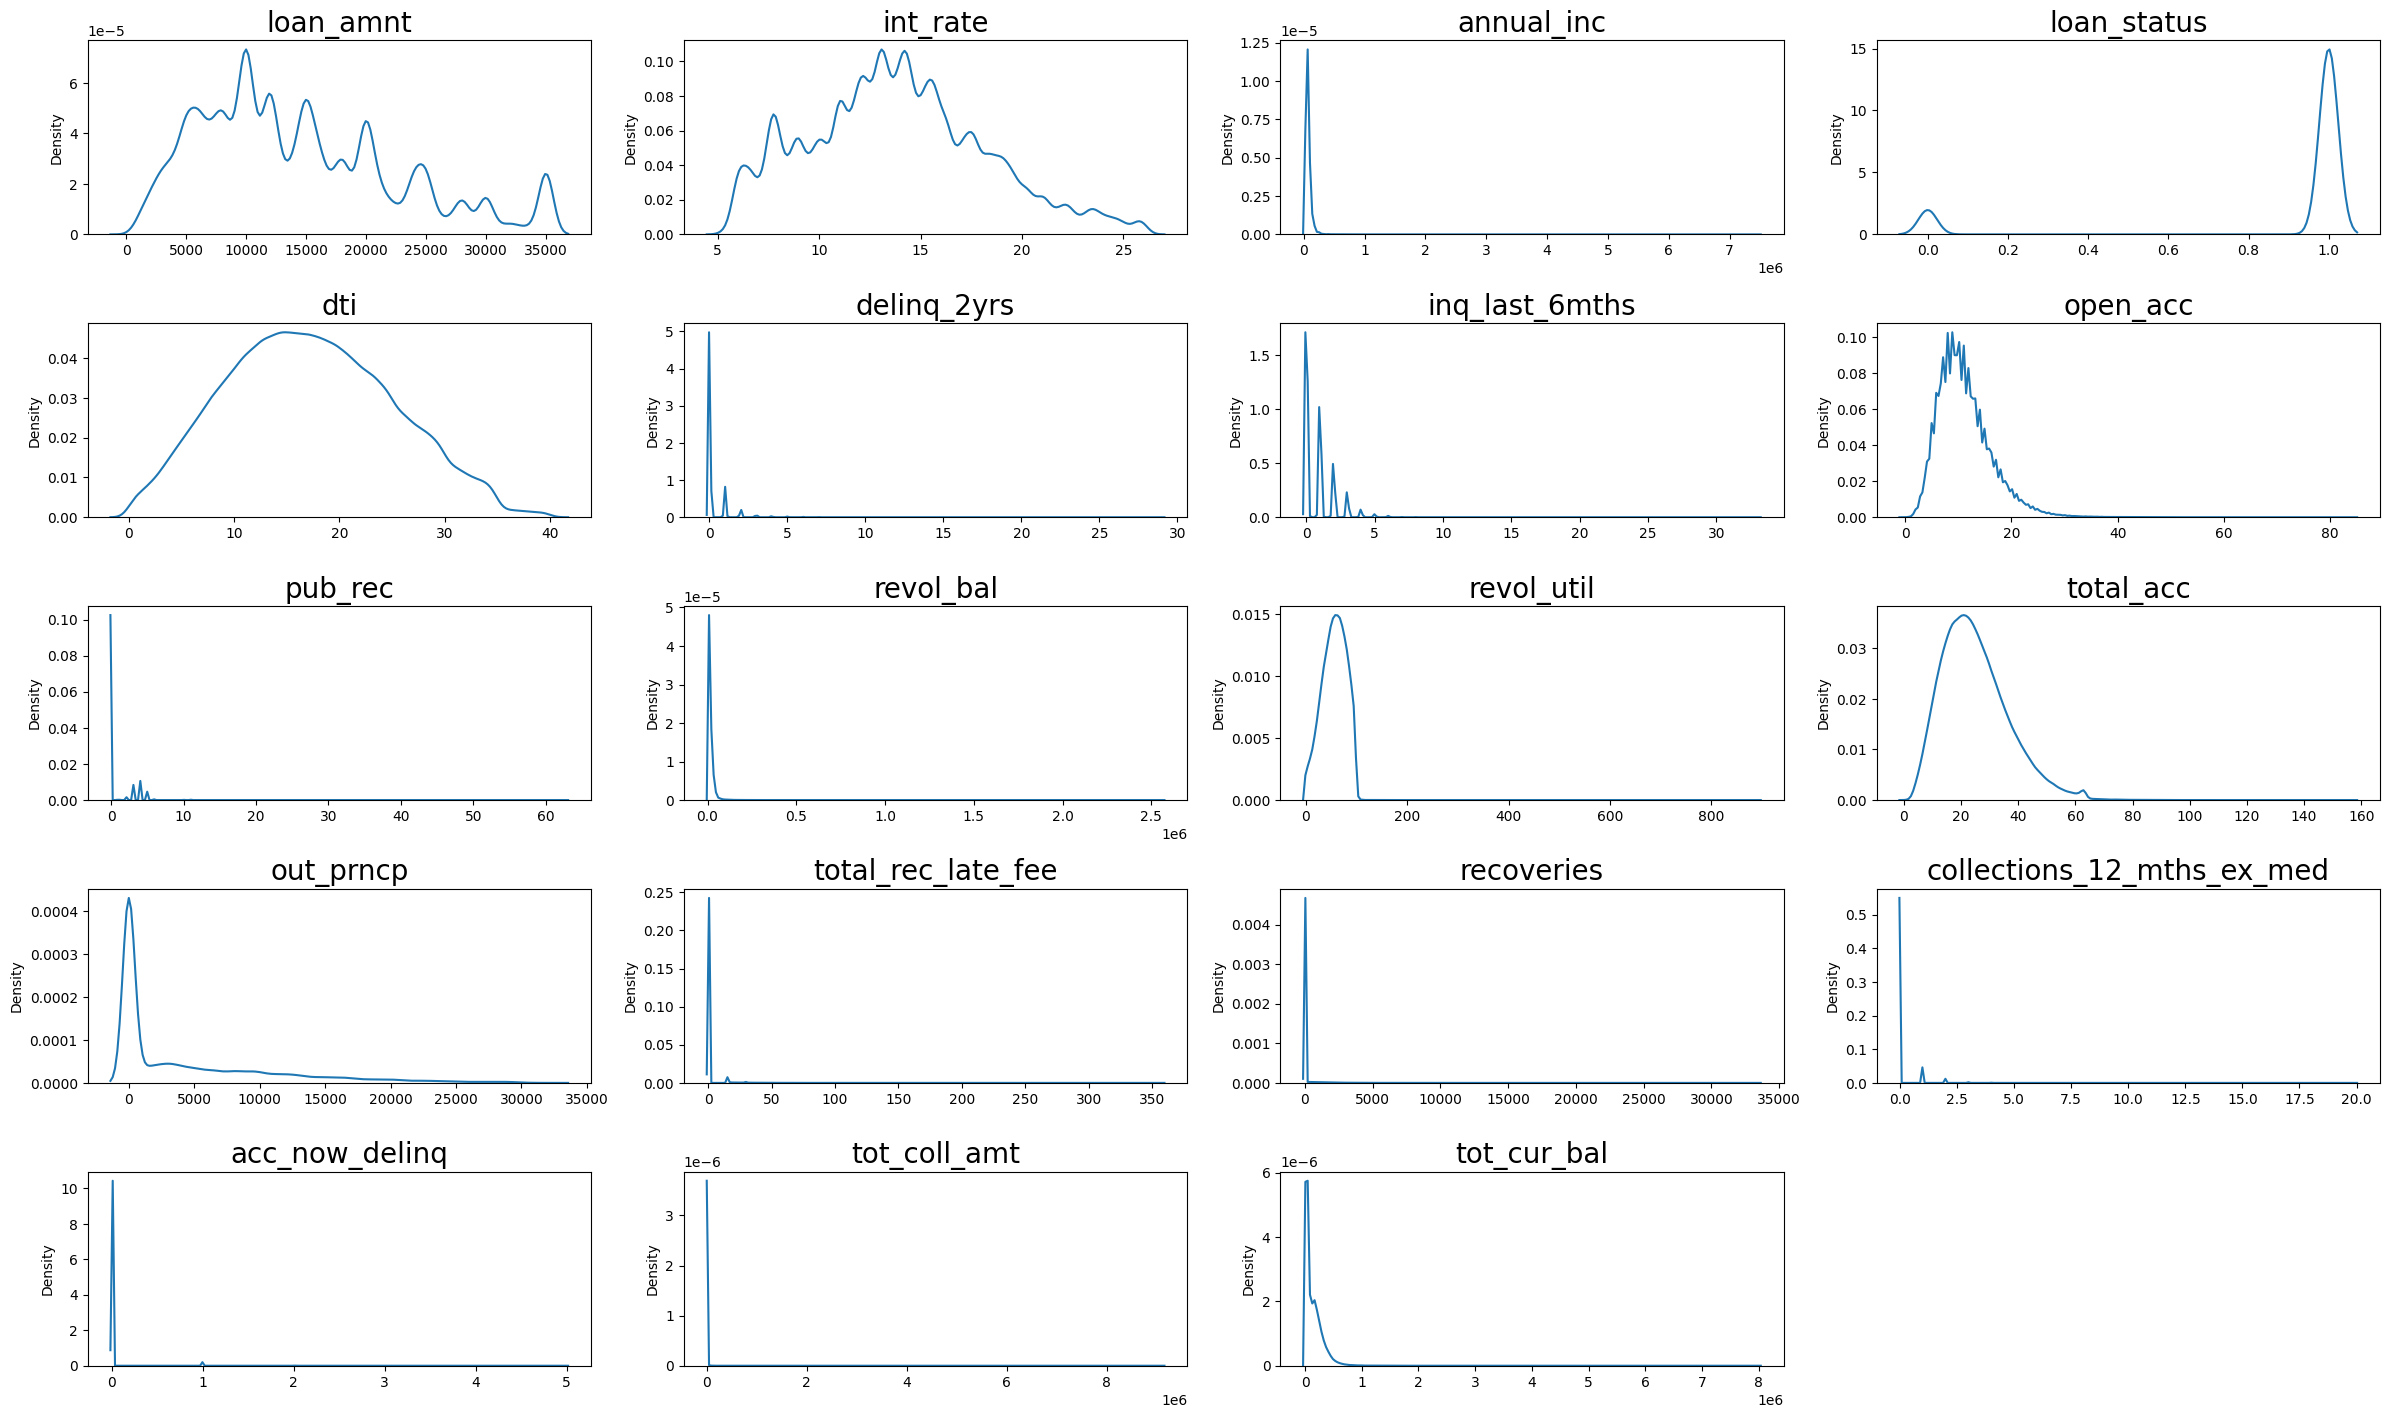

In [20]:
#numerical features
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=df[num[i]], palette='rocket')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

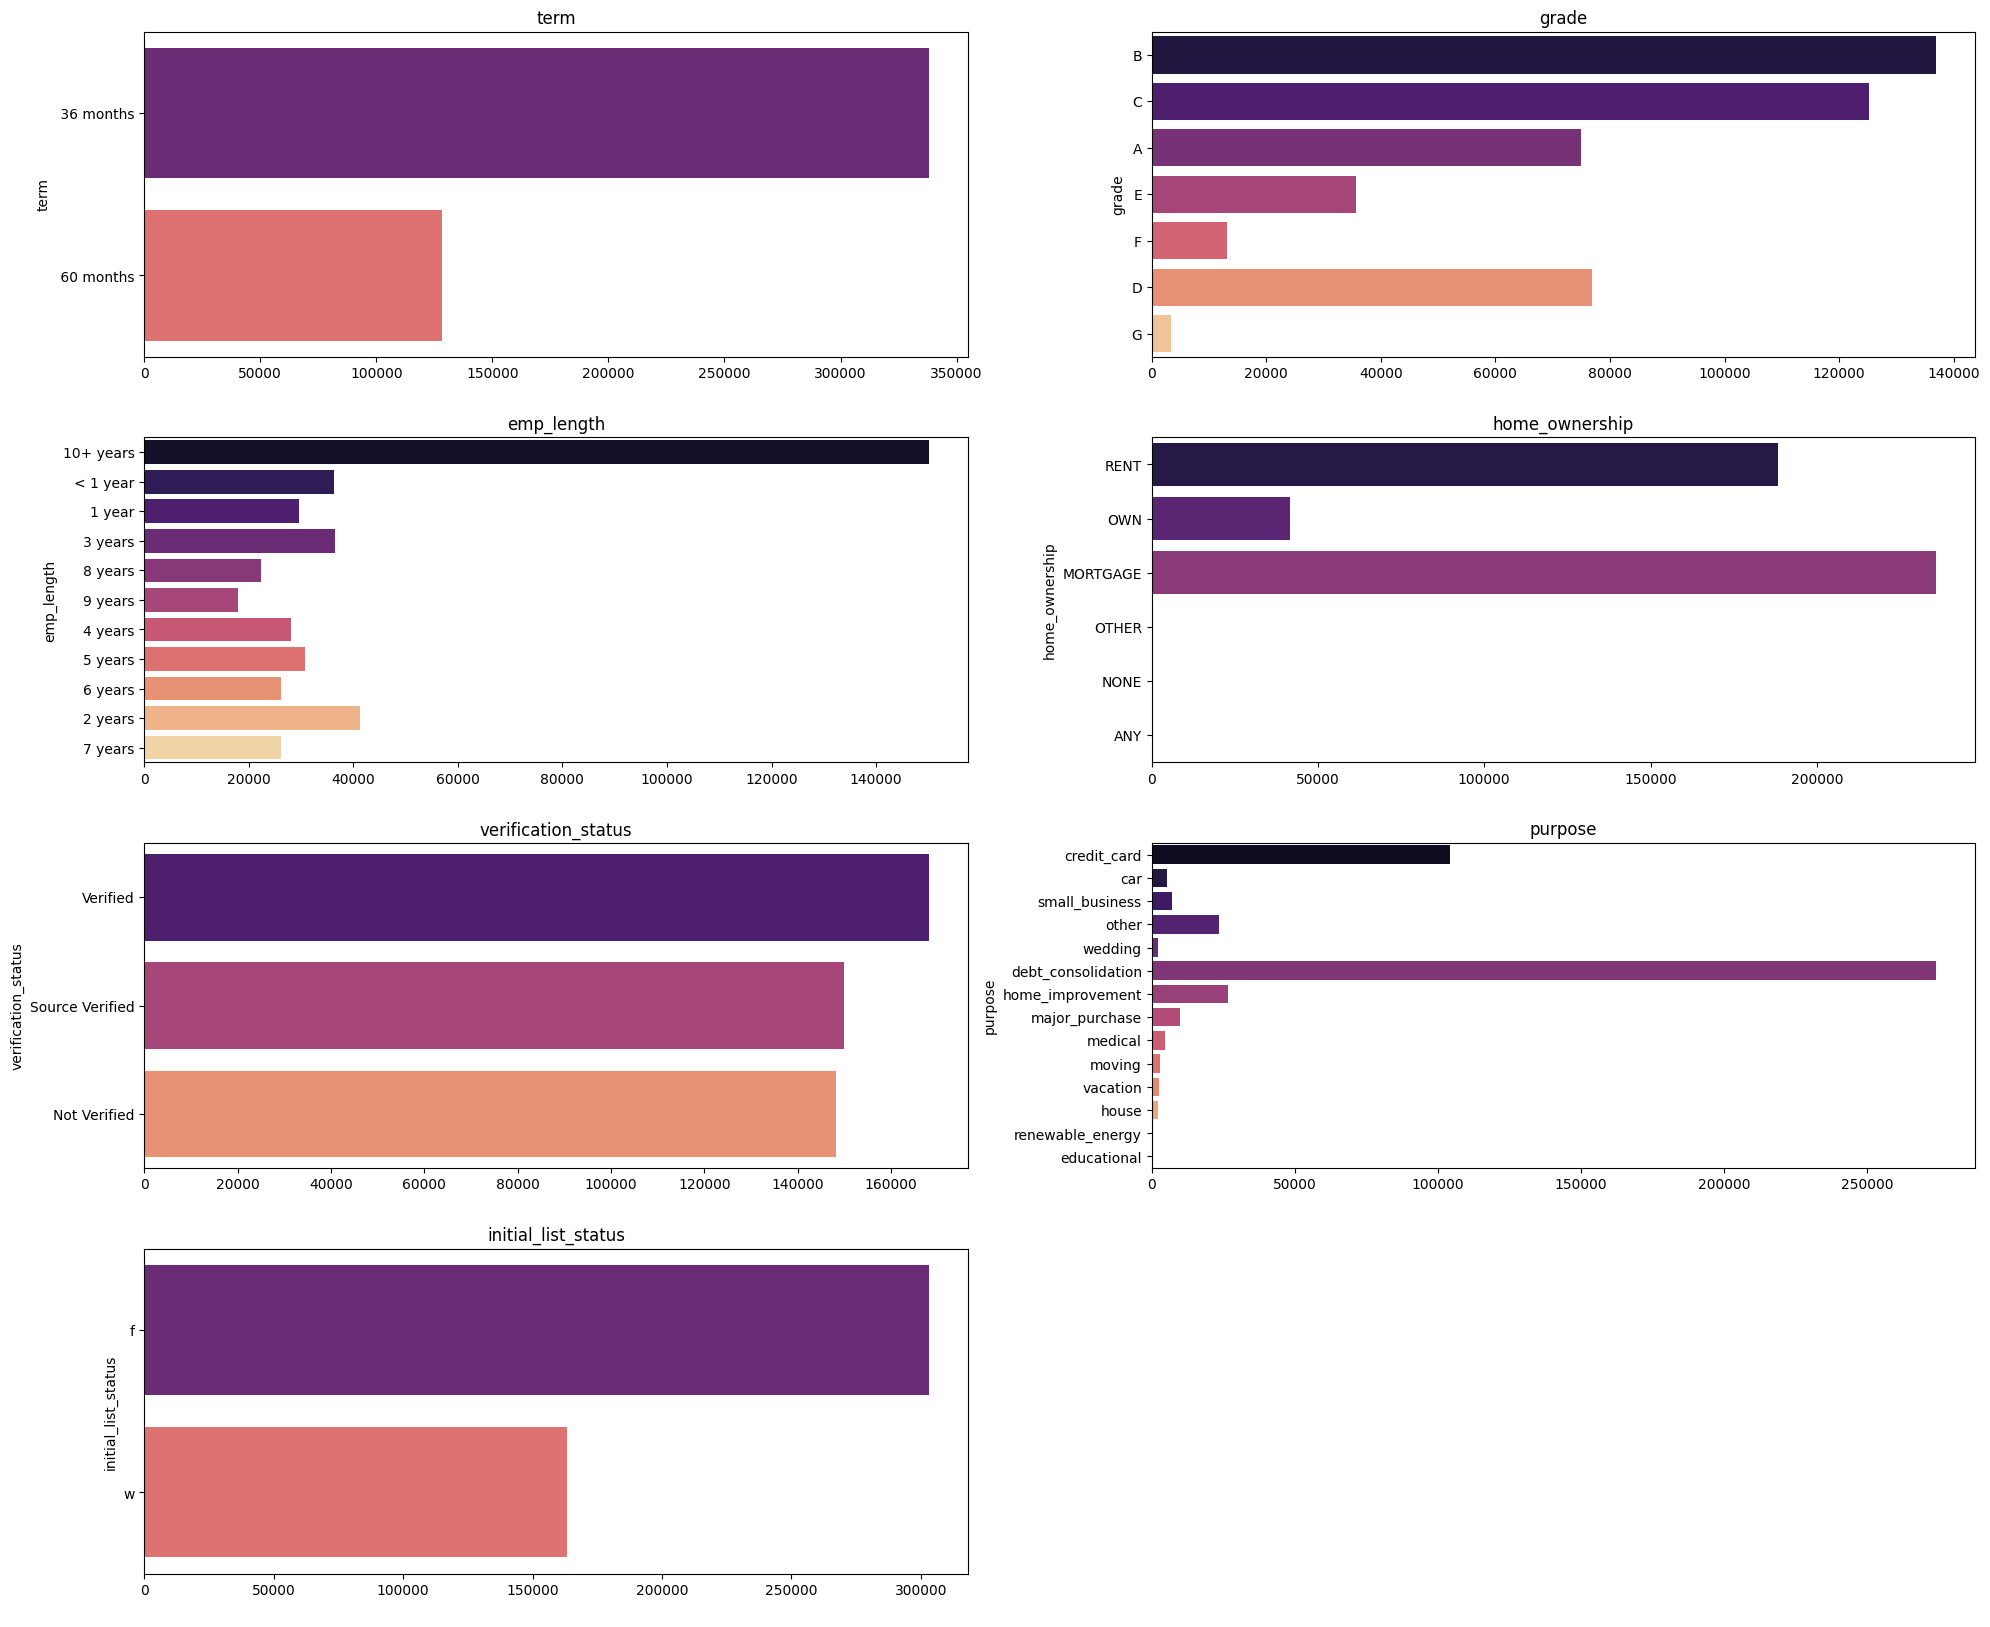

In [21]:
#categorical features
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(5,2,i+1)
    sns.countplot(y=df[cat[i]], orient = 'h',palette='magma')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

### Bivariate Analysis

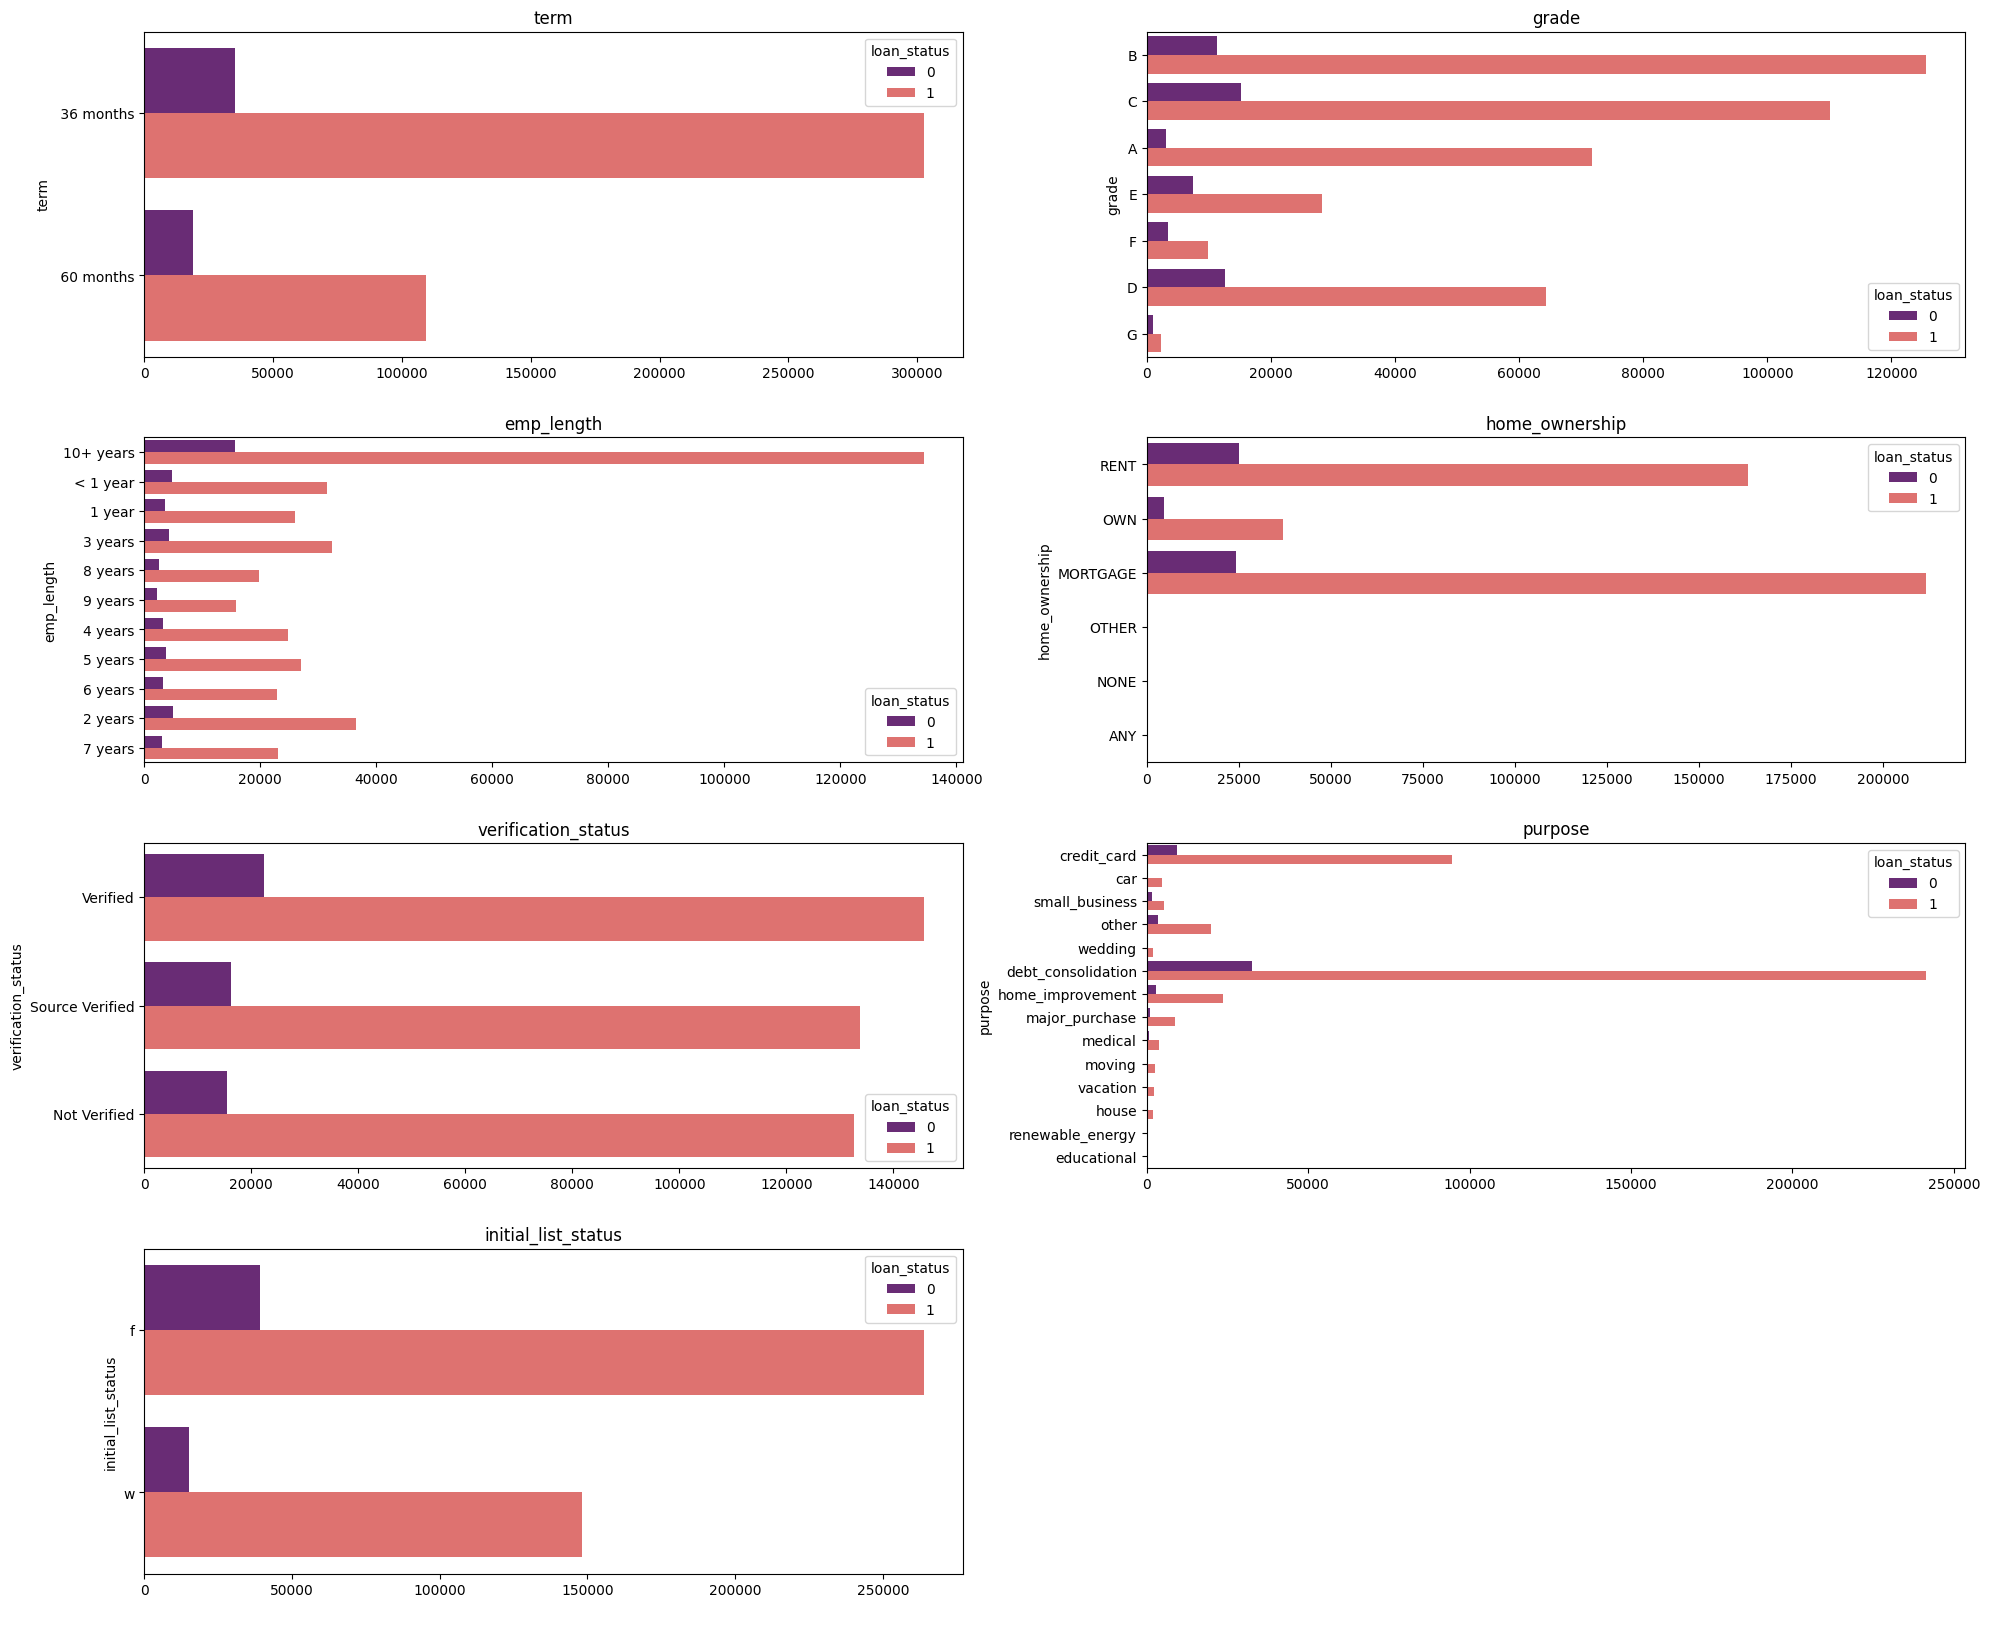

In [22]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(5,2,i+1)
    sns.countplot(y=df[cat[i]], palette='magma', hue=df['loan_status'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

## Feature Engineering with Weight of Evidence and Information Value

In [23]:
df_fe = df.copy()
# Create Function for Weight of Evidence and Invormation Value

def woe(df, feature_name):
    feature_name = df.groupby(feature_name).agg(num_observation=('loan_status','count'),good_loan_prob=('loan_status','mean')).reset_index()
    feature_name['grade_proportion'] = feature_name['num_observation']/feature_name['num_observation'].sum()
    feature_name['num_good_loan'] = feature_name['grade_proportion'] * feature_name['num_observation']
    feature_name['num_bad_loan'] = (1-feature_name['grade_proportion']) * feature_name['num_observation']
    feature_name['good_loan_prop'] = feature_name['num_good_loan'] / feature_name['num_good_loan'].sum()
    feature_name['bad_loan_prop'] = feature_name['num_bad_loan'] / feature_name['num_bad_loan'].sum()
    feature_name['weight_of_evidence'] = np.log(feature_name['good_loan_prop'] / feature_name['bad_loan_prop'])
    feature_name = feature_name.sort_values('weight_of_evidence').reset_index(drop=True)
    feature_name['information_value'] = (feature_name['good_loan_prop']-feature_name['bad_loan_prop']) * feature_name['weight_of_evidence']
    feature_name['information_value'] = feature_name['information_value'].sum()

    #Show
    feature_name = feature_name.drop(['grade_proportion','num_good_loan','num_bad_loan','good_loan_prop','bad_loan_prop'],axis = 1)
    return feature_name

###Categorical Features

In [24]:
#grade
woe(df_fe,'grade')

,grade,num_observation,good_loan_prob,weight_of_evidence,information_value
0,G,3322,0.679711,-3.660567,0.292639
1,F,13229,0.741401,-2.257091,0.292639
2,E,35757,0.789775,-1.211753,0.292639
3,A,74867,0.959328,-0.377550,0.292639
4,D,76888,0.835787,-0.345737,0.292639
5,C,125293,0.878493,0.275309,0.292639
6,B,136929,0.917643,0.398836,0.292639


In [25]:
#emp_length
woe(df_fe,'emp_length')

,emp_length,num_observation,good_loan_prob,weight_of_evidence,information_value
0,9 years,17888,0.881093,-1.513681,0.879587
1,8 years,22395,0.884349,-1.278372,0.879587
2,6 years,26112,0.876800,-1.115987,0.879587
3,7 years,26180,0.883613,-1.113224,0.879587
4,4 years,28023,0.882240,-1.040787,0.879587
5,1 year,29622,0.877017,-0.981455,0.879587
6,5 years,30774,0.878696,-0.940527,0.879587
7,< 1 year,36265,0.867944,-0.763008,0.879587
8,3 years,36596,0.882446,-0.753113,0.879587
9,2 years,41373,0.881251,-0.618666,0.879587


In [26]:
#home_ownership
woe(df_fe,'home_ownership')

,home_ownership,num_observation,good_loan_prob,weight_of_evidence,information_value
0,ANY,1,1.000000,-12.759563,0.31222
1,NONE,50,0.760000,-8.847435,0.31222
2,OTHER,182,0.642857,-7.555168,0.31222
3,OWN,41704,0.885359,-2.027518,0.31222
4,RENT,188473,0.866501,-0.095002,0.31222
5,MORTGAGE,235875,0.897594,0.316429,0.31222


In [27]:
#verification_status
woe(df_fe,'verification_status')

,verification_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,Not Verified,148237,0.895262,-0.075220,0.007663
1,Source Verified,149993,0.891342,-0.057908,0.007663
2,Verified,168055,0.867008,0.114596,0.007663


In [28]:
#purpose
woe(df_fe,'purpose')

,purpose,num_observation,good_loan_prob,weight_of_evidence,information_value
0,renewable_energy,351,0.840456,-6.796087,1.409257
1,educational,422,0.637441,-6.611715,1.409257
2,house,2269,0.843543,-4.925653,1.409257
3,wedding,2343,0.860009,-4.893401,1.409257
4,vacation,2487,0.872135,-4.833445,1.409257
5,moving,2994,0.834335,-4.646819,1.409257
6,medical,4602,0.856584,-4.213461,1.409257
7,car,5397,0.900130,-4.052385,1.409257
8,small_business,7013,0.766862,-3.786951,1.409257
9,major_purchase,9828,0.891941,-3.443333,1.409257


In [29]:
#initial_list_status
woe(df_fe,'initial_list_status')

,initial_list_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,w,163280,0.907741,-0.798355,0.340013
1,f,303005,0.870926,0.438211,0.340013


In [30]:
#term
woe(df_fe,'term')

,term,num_observation,good_loan_prob,weight_of_evidence,information_value
0,60 months,128332,0.853458,-1.378129,0.72423
1,36 months,337953,0.895346,0.558444,0.72423


###Numerical Features

In [31]:
#loan_amnt
df_fe['loan_amnt_fe'] = pd.cut(df_fe['loan_amnt'],5)
woe(df_fe,'loan_amnt_fe')

,loan_amnt_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(28100.0, 35000.0]",34906,0.875867,-1.391294,0.249414
1,"(21200.0, 28100.0]",52172,0.882504,-0.948559,0.249414
2,"(465.5, 7400.0]",103603,0.884096,-0.129926,0.249414
3,"(14300.0, 21200.0]",118918,0.883458,0.051086,0.249414
4,"(7400.0, 14300.0]",156686,0.886116,0.442000,0.249414


In [32]:
#int_rate
df_fe['int_rate_fe'] = pd.cut(df_fe['int_rate'],5)
woe(df_fe,'int_rate_fe')

,int_rate_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(21.932, 26.06]",23189,0.761870,-1.899708,0.284226
1,"(17.804, 21.932]",57785,0.809241,-0.905362,0.284226
2,"(5.399, 9.548]",83978,0.959859,-0.465268,0.284226
3,"(13.676, 17.804]",147973,0.860704,0.284398,0.284226
4,"(9.548, 13.676]",153360,0.911020,0.337225,0.284226


In [33]:
#annual_inc
df_fe['annual_inc_fe'] = np.where((df_fe['annual_inc']>=0)&(df_fe['annual_inc']<=200000),'low_income',
                               np.where((df_fe['annual_inc']>200000)&(df_fe['annual_inc']<=1500000),'med_income','high_income'))
woe(df_fe,'annual_inc_fe')

,annual_inc_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,high_income,23,0.826087,-13.297382,4.081393
1,med_income,7781,0.919548,-7.456657,4.081393
2,low_income,458481,0.883214,0.692909,4.081393


In [34]:
#dti
df_fe['dti_woe'] = pd.cut(df_fe['dti'],5)
woe(df_fe,'dti_woe')

,dti_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(31.992, 39.99]",16407,0.864814,-2.306884,0.293918
1,"(-0.04, 7.998]",59690,0.901642,-0.914269,0.293918
2,"(23.994, 31.992]",80361,0.863827,-0.564727,0.293918
3,"(7.998, 15.996]",154680,0.897110,0.304006,0.293918
4,"(15.996, 23.994]",155147,0.876072,0.308521,0.293918


In [35]:
#delinq_2yrs

# this feature will be encoded, if values = 0 return 0,
# if its greater than 0 return 1, if > 5, return 2
df_fe['delinq_2yrs_fs'] = np.where(df_fe['delinq_2yrs'] > 3, 3,
                                 np.where(df_fe['delinq_2yrs'] == 2, 2,
                                 np.where(df_fe['delinq_2yrs'] == 1,1,0)))
woe(df_fe,'delinq_2yrs_fs')

,delinq_2yrs_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,3,5084,0.881786,-5.406375,2.038543
1,2,16310,0.880135,-4.216053,2.038543
2,1,56224,0.885654,-2.885602,2.038543
3,0,388667,0.883733,0.712284,2.038543


In [36]:
#inq_last_6mths
#encoding the feature
df_fe['inq_last_6mths_fe'] = np.where(df_fe['inq_last_6mths'] == 0,0,
                                    np.where((df_fe['inq_last_6mths'] > 0)&
                                    (df_fe['inq_last_6mths'] <=3),1,
                                    np.where((df_fe['inq_last_6mths']>3)&
                                    (df_fe['inq_last_6mths']<=6),2,
                                    np.where((df_fe['inq_last_6mths']>6)&
                                    (df_fe['inq_last_6mths']<=9),3,4))))
woe(df_fe,'inq_last_6mths_fe')

,inq_last_6mths_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,4,124,0.000000,-8.142665,0.189219
1,3,367,0.147139,-7.057064,0.189219
2,2,11197,0.737162,-3.615505,0.189219
3,1,213099,0.869033,-0.083028,0.189219
4,0,241498,0.905237,0.161047,0.189219


In [37]:
#open_acc
# refining class = 5 class
df_fe['open_acc_fe'] = pd.cut(df_fe['open_acc'], 5)
woe(df_fe,'open_acc_fe')

,open_acc_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(67.2, 84.0]",4,0.500000,-12.858617,1.830315
1,"(50.4, 67.2]",22,1.000000,-11.153831,1.830315
2,"(33.6, 50.4]",898,0.886414,-7.442823,1.830315
3,"(16.8, 33.6]",61622,0.886907,-3.074394,1.830315
4,"(-0.084, 16.8]",403710,0.883401,0.672364,1.830315


In [38]:
#pub_rec
# refining class = 5 class
df_fe['pub_rec_fe'] = pd.cut(df_fe['pub_rec'], 5)
woe(df_fe,'pub_rec_fe')

,pub_rec_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(25.2, 37.8]",1,1.000000,-22.703740,10.838586
1,"(37.8, 50.4]",2,1.000000,-22.010591,10.838586
2,"(50.4, 63.0]",2,1.000000,-22.010591,10.838586
3,"(12.6, 25.2]",10,1.000000,-20.401136,10.838586
4,"(-0.063, 12.6]",466241,0.883869,0.693155,10.838586


In [39]:
#revol_bal
#encoding the feature
df_fe['revol_bal_fe'] = np.where((df_fe['revol_bal']>=0)&(df_fe['revol_bal']<=5000),0,
                               np.where((df_fe['revol_bal']>5000)&(df_fe['revol_bal']<=10000),1,
                               np.where((df_fe['revol_bal']>10000)&(df_fe['revol_bal']<=15000),2,3)))
woe(df_fe,'revol_bal_fe')

,revol_bal_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,82590,0.875239,-0.576520,0.197731
1,2,88805,0.882011,-0.487635,0.197731
2,1,115537,0.880480,-0.151038,0.197731
3,3,179353,0.890813,0.489550,0.197731


In [40]:
#revol_util
#encoding the feature
df_fe['revol_util_fe'] = np.where((df_fe['revol_util']>=0)&(df_fe['revol_util']<=20),0,
                                  np.where((df_fe['revol_util']>20)&(df_fe['revol_util']<=40),1,
                                           np.where((df_fe['revol_util']>40)&(df_fe['revol_util']<=60),2,
                                                    np.where((df_fe['revol_util']>60)&(df_fe['revol_util']<=80),3,4))))
woe(df_fe,'revol_util_fe')

,revol_util_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,37402,0.907438,-1.219335,0.15665
1,1,83492,0.901679,-0.302619,0.15665
2,4,84402,0.858913,-0.289398,0.15665
3,2,129397,0.889541,0.263259,0.15665
4,3,131592,0.876117,0.286617,0.15665


In [41]:
#total_acc
#encoding the feature
df_fe['total_acc_woe'] = pd.cut(df_fe['total_acc'],5)
woe(df_fe,'total_acc_woe')

,total_acc_woe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(125.0, 156.0]",2,1.000000,-12.936214,1.034434
1,"(94.0, 125.0]",28,0.964286,-10.297101,1.034434
2,"(63.0, 94.0]",1221,0.904177,-6.519318,1.034434
3,"(32.0, 63.0]",107819,0.891911,-1.778175,1.034434
4,"(0.845, 32.0]",357186,0.881370,0.609391,1.034434


In [42]:
#out_prncp
#Encoding into new class
df_fe['out_prncp_fe'] = np.where((df_fe['out_prncp']>=0)&(df_fe['out_prncp']<=1000),0,
                               np.where((df_fe['out_prncp']>1000)&(df_fe['out_prncp']<=10000),1,
                               np.where((df_fe['out_prncp']>10000)&(df_fe['out_prncp']<=17000),2,3)))
woe(df_fe,'out_prncp_fe')

,out_prncp_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,3,28933,0.948225,-2.216759,0.587279
1,2,53928,0.956887,-1.535243,0.587279
2,1,142293,0.965585,-0.323834,0.587279
3,0,241131,0.811497,0.567552,0.587279


In [43]:
#total_rec_late_fee
#Encoding into new class
df_fe['total_rec_late_fee_fe'] = np.where(df_fe['total_rec_late_fee']==0,0,1)
woe(df_fe,'total_rec_late_fee_fe')

,total_rec_late_fee_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,1,10678,0.507024,-6.814292,3.749324
1,0,455607,0.892649,0.692598,3.749324


In [44]:
#recoveries
df_fe['recoveries_fe'] = pd.cut(df_fe['recoveries'], 5)
woe(df_fe,'recoveries_fe')

,recoveries_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(26816.216, 33520.27]",5,0.000000,-17.866686,7.407134
1,"(20112.162, 26816.216]",13,0.000000,-16.911158,7.407134
2,"(13408.108, 20112.162]",45,0.000000,-15.669376,7.407134
3,"(6704.054, 13408.108]",315,0.000000,-13.722887,7.407134
4,"(-33.52, 6704.054]",465907,0.884535,0.693264,7.407134


In [45]:
#collections_12_mths_ex_med
df_fe['collections_12_mths_ex_med_fe'] = pd.cut(df_fe['collections_12_mths_ex_med'],5)
woe(df_fe,'collections_12_mths_ex_med_fe')

,collections_12_mths_ex_med_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(12.0, 16.0]",1,1.000000,-24.025028,12.185834
1,"(16.0, 20.0]",1,1.000000,-24.025028,12.185834
2,"(4.0, 8.0]",2,1.000000,-23.331878,12.185834
3,"(-0.02, 4.0]",466136,0.883985,0.693150,12.185834
4,"(8.0, 12.0]",0,NaN,NaN,12.185834


In [46]:
#acc_now_delinq
df_fe['acc_now_delinq_fe'] = pd.cut(df_fe['acc_now_delinq'],5)
woe(df_fe,'acc_now_delinq_fe')

,acc_now_delinq_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(4.0, 5.0]",2,0.500000,-20.027068,8.645855
1,"(3.0, 4.0]",4,1.000000,-19.333916,8.645855
2,"(2.0, 3.0]",11,0.818182,-18.322300,8.645855
3,"(1.0, 2.0]",92,0.902174,-16.198233,8.645855
4,"(-0.005, 1.0]",466147,0.883871,0.693179,8.645855


In [47]:
#tot_coll_amt
df_fe['tot_coll_amt_fe'] = pd.cut(df_fe['tot_coll_amt'],5)
woe(df_fe,'tot_coll_amt_fe')

,tot_coll_amt_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(7322036.0, 9152545.0]",1,1.000000,-25.085232,12.88919
1,"(-9152.545, 1830509.0]",396008,0.895861,0.693147,12.88919
2,"(1830509.0, 3661018.0]",0,NaN,NaN,12.88919
3,"(3661018.0, 5491527.0]",0,NaN,NaN,12.88919
4,"(5491527.0, 7322036.0]",0,NaN,NaN,12.88919


In [48]:
#tot_cur_bal
df_fe['tot_cur_bal_fe'] = pd.cut(df_fe['tot_cur_bal'],5)
woe(df_fe,'tot_cur_bal_fe')

,tot_cur_bal_fe,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(6400062.4, 8000078.0]",1,1.000000,-20.297412,8.278563
1,"(3200031.2, 4800046.8]",11,0.909091,-17.899492,8.278563
2,"(1600015.6, 3200031.2]",108,0.935185,-15.615011,8.278563
3,"(-8000.078, 1600015.6]",395889,0.895850,0.693175,8.278563
4,"(4800046.8, 6400062.4]",0,NaN,NaN,8.278563


Dari feature engineering diatas, kita akan menghapus fitur dengan information value < 0.02 (useless predictive) dan > 0.5 (suspicious predictive), serta fitur-fitur yang tidak relevan dan tidak masuk akal.

In [49]:
drop_list = ['emp_length','verification_status', 'purpose', 'term','annual_inc',
             'delinq_2yrs', 'total_acc','open_acc', 'pub_rec', 'out_prncp',
             'total_rec_late_fee','recoveries', 'collections_12_mths_ex_med',
             'acc_now_delinq','tot_coll_amt','tot_cur_bal']

df.drop(drop_list, axis = 1, inplace=True)

##Feature Encoding

In [50]:
df_encode = df.copy()

###Label Encoding

In [51]:
print(df_encode['grade'].unique())
print(df_encode['home_ownership'].unique())
print(df_encode['initial_list_status'].unique())

['B' 'C' 'A' 'E' 'F' 'D' 'G']
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
['f' 'w']


In [52]:
df_encode['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

In [53]:
# Replace label with same characteristic
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}

df_encode["home_ownership"] = df_encode["home_ownership"].map(target_dict)

In [54]:
df_encode['initial_list_status'] = np.where(df_encode['initial_list_status']=='f',0,1)

###One Hot Encoding: Categorical

In [55]:
for cat in ['grade', 'home_ownership', 'initial_list_status']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df_encode = df_encode.join(onehots)

In [56]:
df_encode = df_encode.drop(columns=['grade', 'home_ownership', 'initial_list_status'], axis =1)
df_encode.head()

,loan_amnt,int_rate,loan_status,dti,inq_last_6mths,revol_bal,revol_util,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w
0,5000,10.65,1,27.65,1.0,13648,83.7,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1,2500,15.27,0,1.00,5.0,1687,9.4,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2,2400,15.96,1,8.72,2.0,2956,98.5,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,10000,13.49,1,20.00,1.0,5598,21.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,3000,12.69,1,17.94,0.0,27783,53.9,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0


In [57]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  int64  
 1   int_rate                 466285 non-null  float64
 2   loan_status              466285 non-null  int64  
 3   dti                      466285 non-null  float64
 4   inq_last_6mths           466256 non-null  float64
 5   revol_bal                466285 non-null  int64  
 6   revol_util               465945 non-null  float64
 7   grade_A                  466285 non-null  uint8  
 8   grade_B                  466285 non-null  uint8  
 9   grade_C                  466285 non-null  uint8  
 10  grade_D                  466285 non-null  uint8  
 11  grade_E                  466285 non-null  uint8  
 12  grade_F                  466285 non-null  uint8  
 13  grade_G                  466285 non-null  uint8  
 14  home

###Standardization with Standard Scaler

In [58]:
from sklearn.preprocessing import StandardScaler

con_cols = [col for col in df_encode.columns.tolist()]
ss = StandardScaler()
std_cols = pd.DataFrame(ss.fit_transform(df_encode[con_cols]), columns=con_cols)

In [59]:
std_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  float64
 1   int_rate                 466285 non-null  float64
 2   loan_status              466285 non-null  float64
 3   dti                      466285 non-null  float64
 4   inq_last_6mths           466256 non-null  float64
 5   revol_bal                466285 non-null  float64
 6   revol_util               465945 non-null  float64
 7   grade_A                  466285 non-null  float64
 8   grade_B                  466285 non-null  float64
 9   grade_C                  466285 non-null  float64
 10  grade_D                  466285 non-null  float64
 11  grade_E                  466285 non-null  float64
 12  grade_F                  466285 non-null  float64
 13  grade_G                  466285 non-null  float64
 14  home

###One Hot Encoding: Numerical

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
#Label encoding

le = LabelEncoder()

columns = [ 'loan_amnt', 'int_rate', 'loan_status', 'dti', 'inq_last_6mths',
       'revol_bal', 'revol_util'
]

for col in columns:
    df_encode[col] = le.fit_transform(df[col])

In [62]:
df_encode.var()

loan_amnt                  1.084771e+05
int_rate                   1.780022e+04
loan_status                1.026841e-01
dti                        6.163881e+05
inq_last_6mths             1.233633e+00
revol_bal                  1.387978e+08
revol_util                 6.533598e+04
grade_A                    1.347812e-01
grade_B                    2.074240e-01
grade_C                    1.965029e-01
grade_D                    1.377048e-01
grade_E                    7.080444e-02
grade_F                    2.756620e-02
grade_G                    7.073656e-03
home_ownership_ANY         2.144611e-06
home_ownership_MORTGAGE    2.499662e-01
home_ownership_NONE        1.072193e-04
home_ownership_OTHER       3.901677e-04
home_ownership_OWN         8.143973e-02
home_ownership_RENT        2.408231e-01
initial_list_status_f      2.275521e-01
initial_list_status_w      2.275521e-01
dtype: float64

In [63]:
df_encode.shape

(466285, 22)

In [64]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   loan_amnt                466285 non-null  int64
 1   int_rate                 466285 non-null  int64
 2   loan_status              466285 non-null  int64
 3   dti                      466285 non-null  int64
 4   inq_last_6mths           466285 non-null  int64
 5   revol_bal                466285 non-null  int64
 6   revol_util               466285 non-null  int64
 7   grade_A                  466285 non-null  uint8
 8   grade_B                  466285 non-null  uint8
 9   grade_C                  466285 non-null  uint8
 10  grade_D                  466285 non-null  uint8
 11  grade_E                  466285 non-null  uint8
 12  grade_F                  466285 non-null  uint8
 13  grade_G                  466285 non-null  uint8
 14  home_ownership_ANY       466285 non-

#Modeling

##Split Train and Test Dataset

In [65]:
from datetime import datetime as dt
from collections import defaultdict
from xgboost import XGBClassifier
import lightgbm as lgb
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score, roc_curve, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [66]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur (X) dan target (y)
X = df_encode.drop('loan_status', axis=1)
y = df_encode['loan_status']

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
def modelling(x_train,x_test,y_train,y_test):
    result = defaultdict(list)

    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    ab = AdaBoostClassifier()
    nb = GaussianNB()
    knn = KNeighborsClassifier()
    xgb = XGBClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    LGBM = lgb.LGBMClassifier()


    list_model = [('Logistic Regression',lr),
                  ('Decision Tree',dt),
                  ('AdaBoost', ab),
                  ('Gaussian NB', nb),
                  ('K-Nearest Neighbor',knn),
                  ('XgBoost', xgb),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad),
                  ('LightGBM',LGBM)
                  ]

    for model_name, model in list_model:
        model.fit(x_train,y_train)
        y_pred_proba = model.predict_proba(x_test)

        y_pred = model.predict(x_test)

        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        AUC = roc_auc_score(y_test, y_pred_proba[:, 1])

        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['AUC'].append(AUC)

    return result

In [68]:
evaluation_summary = modelling(X_train, X_test, y_train,y_test)
evaluation_summary = pd.DataFrame(evaluation_summary)
evaluation_summary

,model_name,model,accuracy,recall,precision,AUC
0,Logistic Regression,LogisticRegression(),0.884234,1.000000,0.884224,0.667717
1,Decision Tree,DecisionTreeClassifier(),0.797892,0.876706,0.892774,0.536557
2,AdaBoost,"(DecisionTreeClassifier(max_depth=1, random_st...",0.884952,0.999600,0.885133,0.683971
3,Gaussian NB,GaussianNB(),0.866391,0.967193,0.891009,0.674701
4,K-Nearest Neighbor,KNeighborsClassifier(),0.872213,0.982754,0.885333,0.545409
5,XgBoost,"XGBClassifier(base_score=None, booster=None, c...",0.887429,0.999005,0.887743,0.694556
6,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.886293,0.997332,0.887882,0.655661
7,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.886239,0.999624,0.886258,0.690868
8,LightGBM,LGBMClassifier(),0.887504,0.999248,0.887643,0.696074


Diantara semua model machine learning yang diuji, dengan mempertimbangkan nilai akurasi, precision, recall dan AUC paling tinggi, diputuskan untuk menggunakan metode Light GBM.

In [69]:
lg_model = lgb.LGBMClassifier()
lg_model.fit(X_train, y_train)
y_pred_lg = lg_model.predict(X_test)

In [70]:
def show_cmatrix(ytest, pred):
    # Creating confusion matrix
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form
    cm_df = pd.DataFrame(cm, index=['Bad Loan', 'Good Loan'],
                 columns=['Predicted Bad Loan', 'Predicted Good Loan'])

    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,6))

    sns.heatmap(cm, annot=True, fmt='g', cmap="Reds",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label');

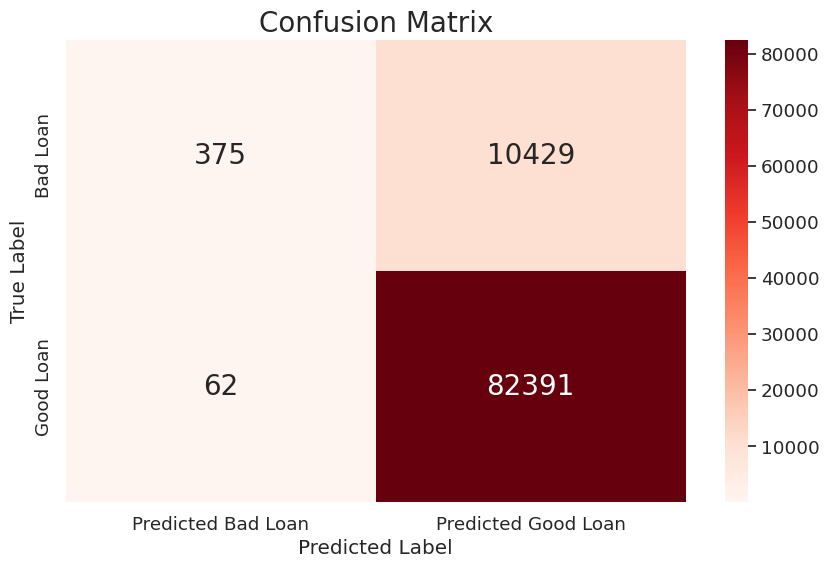

In [71]:
show_cmatrix(y_test, y_pred_lg)

##Hyperparameter Tuning Menggunakan Metode Undersampling

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
def evaluation_tuned(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print('**EVALUATION WITH UNDERSAMPLING**\nAUC Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_train,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')

    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')

    print('**CONFUSION MATRIX**')
    print(confusion_matrix(y_test, y_pred))

In [74]:
lgbm = lgb.LGBMClassifier()
lgbm_hyparameters = {'max_depth': [4, 5], #
                     'min_child_samples': [20, 25], #
                     'learning_rate': [0.8, 0.9], #
                     'num_leaves': [15, 17], #
                     'subsample': [0.3, 0.4], #
                     'colsample_bytree': [0.8, 0.85],
                     'reg_alpha': [0.15, 0.19], #
                     'reg_lambda': [0.1, 0.8]} #

tuned_lgbm = RandomizedSearchCV(lgbm, lgbm_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_lgbm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.85],
                                        'learning_rate': [0.8, 0.9],
                                        'max_depth': [4, 5],
                                        'min_child_samples': [20, 25],
                                        'num_leaves': [15, 17],
                                        'reg_alpha': [0.15, 0.19],
                                        'reg_lambda': [0.1, 0.8],
                                        'subsample': [0.3, 0.4]},
                   random_state=69, scoring='recall')

In [75]:
tuned_lgbm.best_params_

{'subsample': 0.4,
 'reg_lambda': 0.8,
 'reg_alpha': 0.19,
 'num_leaves': 17,
 'min_child_samples': 25,
 'max_depth': 4,
 'learning_rate': 0.8,
 'colsample_bytree': 0.85}

###Evaluation After Hyperparameter Tuning

In [76]:
evaluation_tuned(tuned_lgbm)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.720217
AUC Score Test proba: 0.689506

Others Metrics Evaluation:
Test Accuracy Score : 0.8867
Precision Score Test: 0.8879
Recall Score Test : 0.9979
F1 Score Test : 0.9397

**CONFUSION MATRIX**
[[  412 10392]
 [  170 82283]]


Setelah melakukan hyperparameter tuning, terdapat sedikit penurunan performa pada model, namun nilai metrik-metrik tetap termasuk tinggi.

Hasil tetap menunjukkan bahwa model masih memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif pada dataset.

# Feature Importance

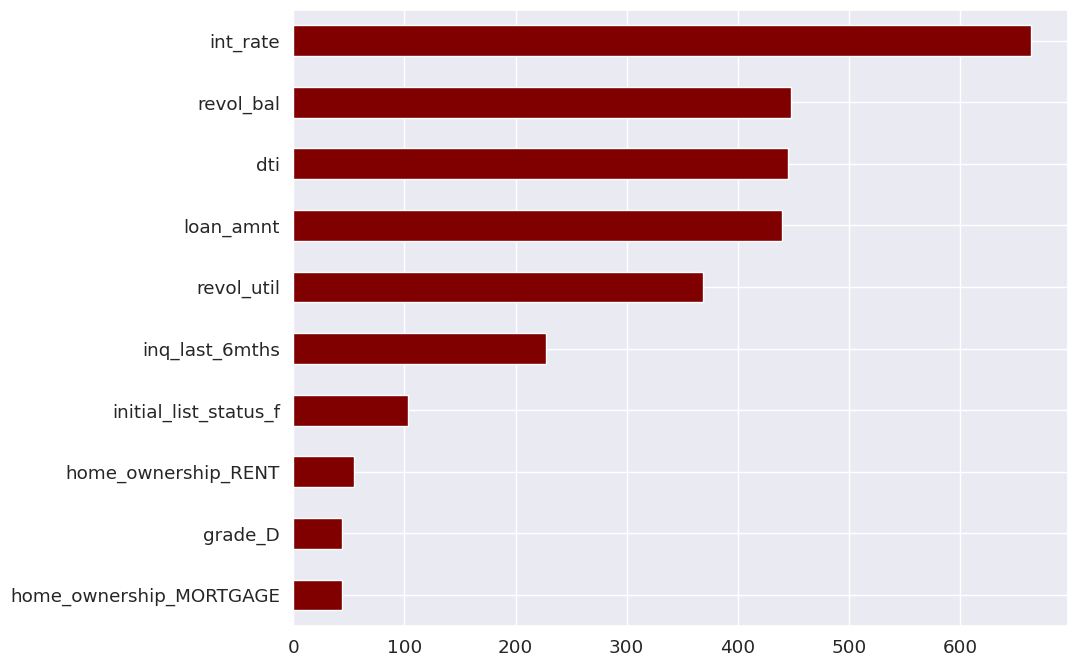

In [77]:
feat_importances = pd.Series(lg_model.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8),color='maroon')
ax.invert_yaxis()

##Conclusion

Setelah dilakukan tuning pada model Light GBM pada dataset credit risk, int_rate (tingkat bunga) memiliki tingkat kepentingan paling tinggi.

Dari 10 fitur tersebut, 2 di antaranya berkaitan dengan jumlah pinjaman dan jumlah utang nasabah (loan_amnt dan revol_bal), 2 berkaitan dengan rasio utang dan pendapatan (dti dan annual_inc), 1 berkaitan dengan tingkat bunga (int_rate) dan 1 berkaitan dengan rasio penggunaan kredit (revol_util). Dari atas juga bisa disimpulkan jika nasabah dengan status pemilikan rumah RENT (sewa) atau MORTGAGE (pergadaian) cenderung lebih banyak membayar utang tepat waktu.

Hal ini menunjukkan bahwa faktor-faktor yang berhubungan dengan jumlah dan rasio hutang, pendapatan, tingkat bunga, dan penggunaan kredit merupakan faktor penting yang perlu diperhatikan dalam menganalisis risiko kredit nasabah.